# Cargue de Librerias #

In [1]:
## Se cargan las librerias matematicas
# Se comienza cargando las librerias de Numpy, MatplotLib y Pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Para cargar las imagenes
import cv2
# Para cargar los archivos de Excel
import pandas as pd
from pandas import DataFrame
# para ver diagrama de barras
import seaborn as sns
# libreria One Hot Coding
from sklearn.preprocessing import LabelBinarizer
# Libreria para datos Train y Test
from sklearn.model_selection import train_test_split
# Librerias para trabajar con redes CNN
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, MaxPool2D
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from keras import models
# Libreria para reportes de modelos
from sklearn.metrics import classification_report
# Libreria matrix confusión
from sklearn.metrics import confusion_matrix
# Librerias para hacer convolucion
from scipy.ndimage.filters import convolve
from scipy.signal import convolve2d
from scipy import misc
# carga la libreria de sistema operativo
import os

Using TensorFlow backend.


# Funciones #

In [2]:
# Create function returning a compiled network
def create_network(neurons=20,activation='relu', optimizer='adam'):
    
    # Inicia la red neuronal
    network = Sequential()
    # Adiciona la primera capa convolucional 
    network.add(Conv2D(neurons, kernel_size=(3,3), activation = activation, input_shape=(320, 240 ,1) ))
    # Adiciona la siguiente capa de Max Pooling
    network.add(MaxPool2D(2))
    # Adiciona la segunda capa convoulucional
    network.add(Conv2D(neurons, kernel_size=3, activation=activation))
    # Adiciona otra capa de Max Pooling
    network.add(MaxPool2D(2))
    # Hace un flatten
    network.add(Flatten())
    # Adiciona la ultima capa
    network.add(Dense(22, activation='softmax'))
    # Compile neural network
    network.compile(loss = keras.losses.categorical_crossentropy, optimizer=optimizer,
              metrics=['accuracy'])
    
    # Return compiled network   
    return network

In [3]:
# funcion para transformar binario a etiqueta
def binaryToWords(input1):
    letras_y_test = []
    señal = ''
    Atardecer =       np.array([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    Bano =            np.array([0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    Casa =            np.array([0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    Color =           np.array([0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    Escuchar =        np.array([0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    Gracias =         np.array([0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    Hola1 =           np.array([0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    Hola2 =           np.array([0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    Hoy =             np.array([0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
    Mama =            np.array([0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0])
    MuchoGusto =      np.array([0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0])
    Nombre =          np.array([0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0])
    Novio =           np.array([0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0])
    Papa =            np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0])
    Profesor =        np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0])
    QuePaso =         np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0])
    Sientese =        np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0])
    Television =      np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0])
    TenerCuriosidad = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0])
    TenerPosesion =   np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0])
    Universidad =     np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0])
    Yo =              np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1])  
    
    for num in input1:
        if np.array_equal(num,Hoy):
            señal = 'HOY'
        elif np.array_equal(num,Yo):
            señal = 'YO'
        elif np.array_equal(num,Hola1):
            señal = 'HOLA1'
        elif np.array_equal(num,Hola2):
            señal = 'HOLA2'
        elif np.array_equal(num,QuePaso):
            señal = 'QUE_PASO_?'
        elif np.array_equal(num,Gracias):
            señal = 'GRACIAS'
        elif np.array_equal(num,MuchoGusto):
            señal = 'MUCHO_GUSTO'
        elif np.array_equal(num,Sientese):
            señal = 'SIENTESE'
        elif np.array_equal(num,Bano):
            señal = 'BANO'
        elif np.array_equal(num,Escuchar):
            señal = 'ESCUCHAR'
        elif np.array_equal(num,Atardecer):
            señal = 'ATARDECER'
        elif np.array_equal(num,Color):
            señal = 'COLOR'
        elif np.array_equal(num,Profesor):
            señal = 'PROFESOR'
        elif np.array_equal(num,Universidad):
            señal = 'UNIVERSIDAD'
        elif np.array_equal(num,Television):
            señal = 'TELEVISION'
        elif np.array_equal(num,Novio):
            señal = 'NOVIO'
        elif np.array_equal(num,Nombre):
            señal = 'NOMBRE'
        elif np.array_equal(num,Papa):
            señal = 'PAPA'
        elif np.array_equal(num,Mama):
            señal = 'MAMA'
        elif np.array_equal(num,TenerPosesion):
            señal = 'TENER_POSESION'
        elif np.array_equal(num,TenerCuriosidad):
            señal = 'TENER_CURIOSIDAD'
        elif np.array_equal(num,Casa):
            señal = 'CASA'
        letras_y_test.append(señal)
    return letras_y_test 

In [4]:
# definimos una funcion para que sea mas facil de leer la matrix
def pretty_confusion_matrix(y_true, y_pred, labels=["HOY","YO","HOLA1","HOLA2","QUE_PASO_?","GRACIAS","MUCHO_GUSTO",
                                                   "SIENTESE","BANO","ESCUCHAR","ATARDECER","COLOR","PROFESOR","UNIVERSIDAD",
                                                   "TELEVISION","NOVIO","NOMBRE","PAPA","MAMA","TENER_POSESION'",
                                                    "TENER_CURIOSIDAD","CASA"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = [l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

# Cargue Datos y Redimensionamiento #

In [5]:
# Se crea la matriz que contendra todas las imagenes entrenadas
matriz = np.zeros((3168,76800))

# Ruta donde estan todos los archivos
ruta = 'C:/Users/ortiz/Documents/NelsonOrtizArchivos/Repositorio Final/'
img_counter = 0

for archivo in os.listdir(ruta):
    print(archivo)
    img_name = archivo
    imagen = cv2.imread(ruta + img_name,cv2.IMREAD_GRAYSCALE)
    nueva_imagen = cv2.resize(imagen,(320,240))
    matriz[img_counter,:] = np.reshape(nueva_imagen,(1,76800))
    img_counter += 1

1000.png
10001.png
10002.png
10003.png
10004.png
10005.png
10006.png
10007.png
10008.png
10009.png
1001.png
10010.png
10011.png
10012.png
1002.png
1003.png
1004.png
1005.png
10082.png
10083.png
10084.png
10085.png
10086.png
10087.png
10093.png
10094.png
10095.png
10096.png
10097.png
10098.png
10149.png
10150.png
10151.png
10152.png
10153.png
10154.png
10155.png
10156.png
10157.png
10158.png
10159.png
10160.png
10211.png
10212.png
10213.png
10214.png
10215.png
10216.png
10217.png
10218.png
10219.png
10220.png
10221.png
10222.png
10287.png
10288.png
10289.png
10290.png
10291.png
10292.png
10293.png
10294.png
10295.png
10296.png
10297.png
10298.png
10378.png
10379.png
10380.png
10381.png
10382.png
10383.png
10384.png
10385.png
10386.png
10387.png
10388.png
10389.png
10453.png
10454.png
10455.png
10456.png
10457.png
10458.png
10459.png
10460.png
10461.png
10462.png
10463.png
10464.png
10561.png
10562.png
10563.png
10564.png
10565.png
10566.png
10567.png
10568.png
10569.png
10570.png
10571.

1901.png
1902.png
1903.png
1904.png
1905.png
1906.png
1907.png
1908.png
1909.png
191.png
1910.png
1911.png
1912.png
192.png
19248.png
19249.png
19250.png
19251.png
19252.png
193.png
194.png
19468.png
19469.png
19470.png
19471.png
19472.png
19473.png
19474.png
19475.png
19476.png
19477.png
19478.png
19479.png
195.png
19515.png
19516.png
19517.png
19518.png
19519.png
19520.png
19521.png
19523.png
19524.png
19525.png
19526.png
19527.png
196.png
19603.png
19604.png
19605.png
19606.png
19607.png
19608.png
19609.png
19617.png
19618.png
19619.png
19620.png
19621.png
19668.png
19669.png
19670.png
19671.png
19672.png
19673.png
19674.png
19675.png
19676.png
19680.png
19681.png
19682.png
19781.png
19782.png
19783.png
19784.png
19785.png
19786.png
19787.png
19788.png
19789.png
19790.png
19791.png
19792.png
19869.png
19870.png
19871.png
19872.png
19873.png
19874.png
19875.png
19876.png
19877.png
19878.png
19879.png
19880.png
19962.png
19963.png
19964.png
19965.png
19966.png
19967.png
19968.png
1996

25831.png
25832.png
25833.png
25834.png
25835.png
25836.png
25837.png
25838.png
25839.png
25883.png
25884.png
25885.png
25886.png
25887.png
25888.png
25889.png
25890.png
25891.png
25892.png
25893.png
25894.png
25909.png
25910.png
25911.png
25912.png
25913.png
25914.png
25915.png
25916.png
25917.png
25918.png
25919.png
25920.png
25975.png
25976.png
25977.png
25978.png
25979.png
25980.png
25981.png
25982.png
25983.png
25984.png
25985.png
25986.png
26007.png
26008.png
26009.png
26010.png
26011.png
26012.png
26013.png
26014.png
26015.png
26016.png
26017.png
26018.png
26218.png
26219.png
26220.png
26221.png
26222.png
26223.png
26224.png
26225.png
26226.png
26227.png
26228.png
26229.png
26261.png
26262.png
26263.png
26264.png
26265.png
26266.png
26267.png
26268.png
26269.png
26270.png
26271.png
26272.png
26304.png
26305.png
26306.png
26307.png
26308.png
26309.png
26310.png
26311.png
26312.png
26313.png
26314.png
26315.png
26338.png
26339.png
26340.png
26341.png
26342.png
26343.png
26344.png


506.png
507.png
508.png
509.png
510.png
511.png
5186.png
5187.png
5188.png
5189.png
5190.png
5191.png
5192.png
5193.png
5194.png
5195.png
5196.png
5197.png
5280.png
5281.png
5282.png
5283.png
5284.png
5285.png
5286.png
5287.png
5288.png
5289.png
5290.png
5291.png
5414.png
5415.png
5416.png
5417.png
5418.png
5419.png
5420.png
5421.png
5422.png
5423.png
5424.png
5425.png
5482.png
5483.png
5484.png
5485.png
5486.png
5487.png
5488.png
5489.png
5490.png
5491.png
5492.png
5493.png
5575.png
5576.png
5577.png
5578.png
5579.png
5580.png
5581.png
5582.png
5583.png
5584.png
5585.png
5586.png
5652.png
5653.png
5654.png
5655.png
5656.png
5657.png
5658.png
5659.png
5660.png
5661.png
5662.png
5663.png
5716.png
5717.png
5718.png
5719.png
5720.png
5721.png
5722.png
5723.png
5724.png
5725.png
5726.png
5727.png
580.png
5809.png
581.png
5810.png
5811.png
5812.png
5813.png
5814.png
5815.png
5816.png
5817.png
5818.png
5819.png
582.png
5820.png
583.png
584.png
585.png
6059.png
6060.png
6061.png
6062.png
6063

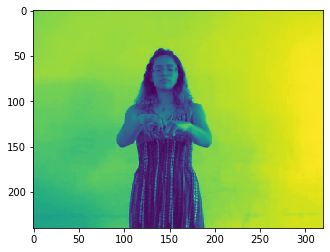

In [6]:
# Vemos una imagen de la matriz al azar
plt.imshow(matriz[98].reshape(240,320))

In [7]:
# Se carga el archivo excel que contiene las etiquetas de los datos usados para el modelo
etiquetas = pd.read_csv("C:/Users/ortiz/Documents/NelsonOrtizArchivos/etiquetas_final_ajustadas.csv")
print("Las dimensiones de las etiquetas son: ",etiquetas.shape)
etiquetas.head(10)

Las dimensiones de las etiquetas son:  (3168, 3)


,Secuencia,Nombre Archivo,Etiqueta
0,1,1000,HOY
1,2,10001,YO
2,3,10002,YO
3,4,10003,YO
4,5,10004,YO
5,6,10005,YO
6,7,10006,YO
7,8,10007,YO
8,9,10008,YO
9,10,10009,YO


In [8]:
# Se separan las etiquetas en un array
labels = etiquetas['Etiqueta'].values
#labels

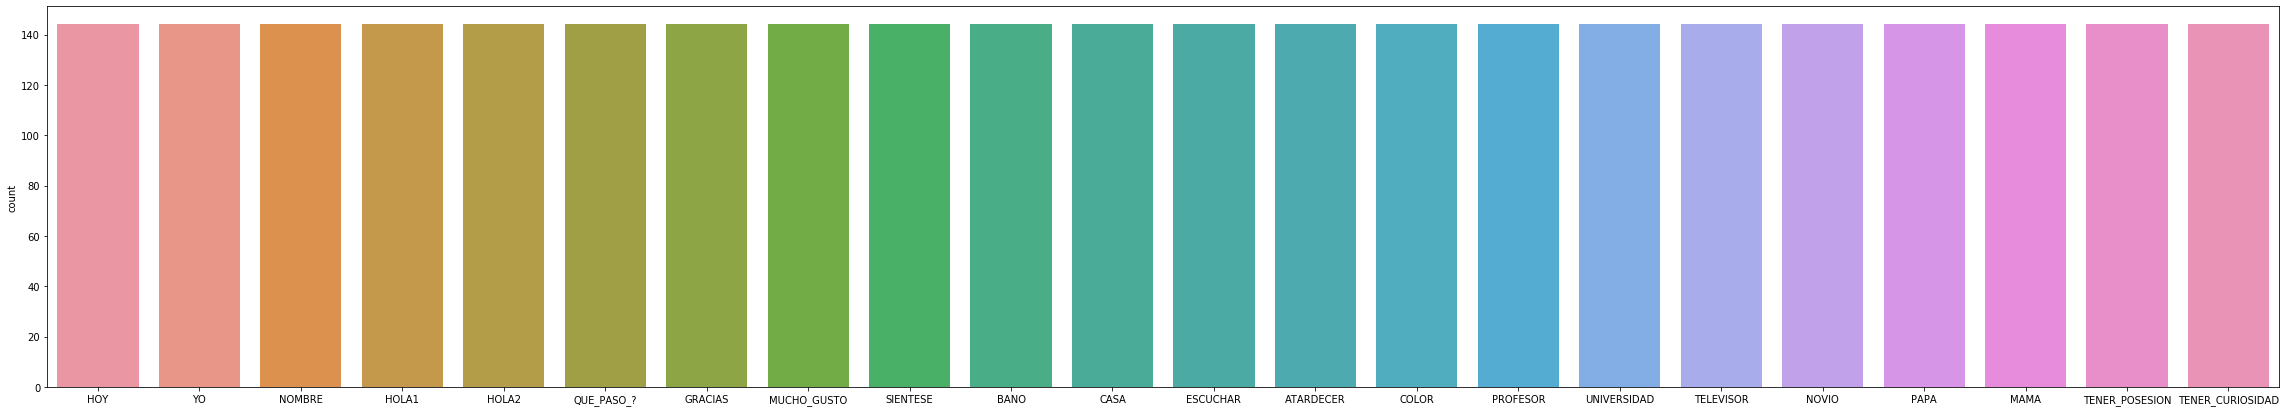

In [9]:
# Grafica de distribucion de los datos
np.unique(np.array(labels))
plt.figure(figsize=(40,7))
sns.countplot(x = labels)

In [10]:
# Transformamos las etiquetas en el modo OneHotCode
label_binrizer = LabelBinarizer()
labels_one = label_binrizer.fit_transform(labels)
print("Las nuevas dimensiones de las etiquetas son: ", labels_one.shape)
labels_one

Las nuevas dimensiones de las etiquetas son:  (3168, 22)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
#Usamos la distribucion de los datos para crear los de entrenamiento y los de pruebas
x_train, x_test, y_train, y_test = train_test_split(matriz, labels, test_size = 0.3, stratify=labels, random_state = 101)

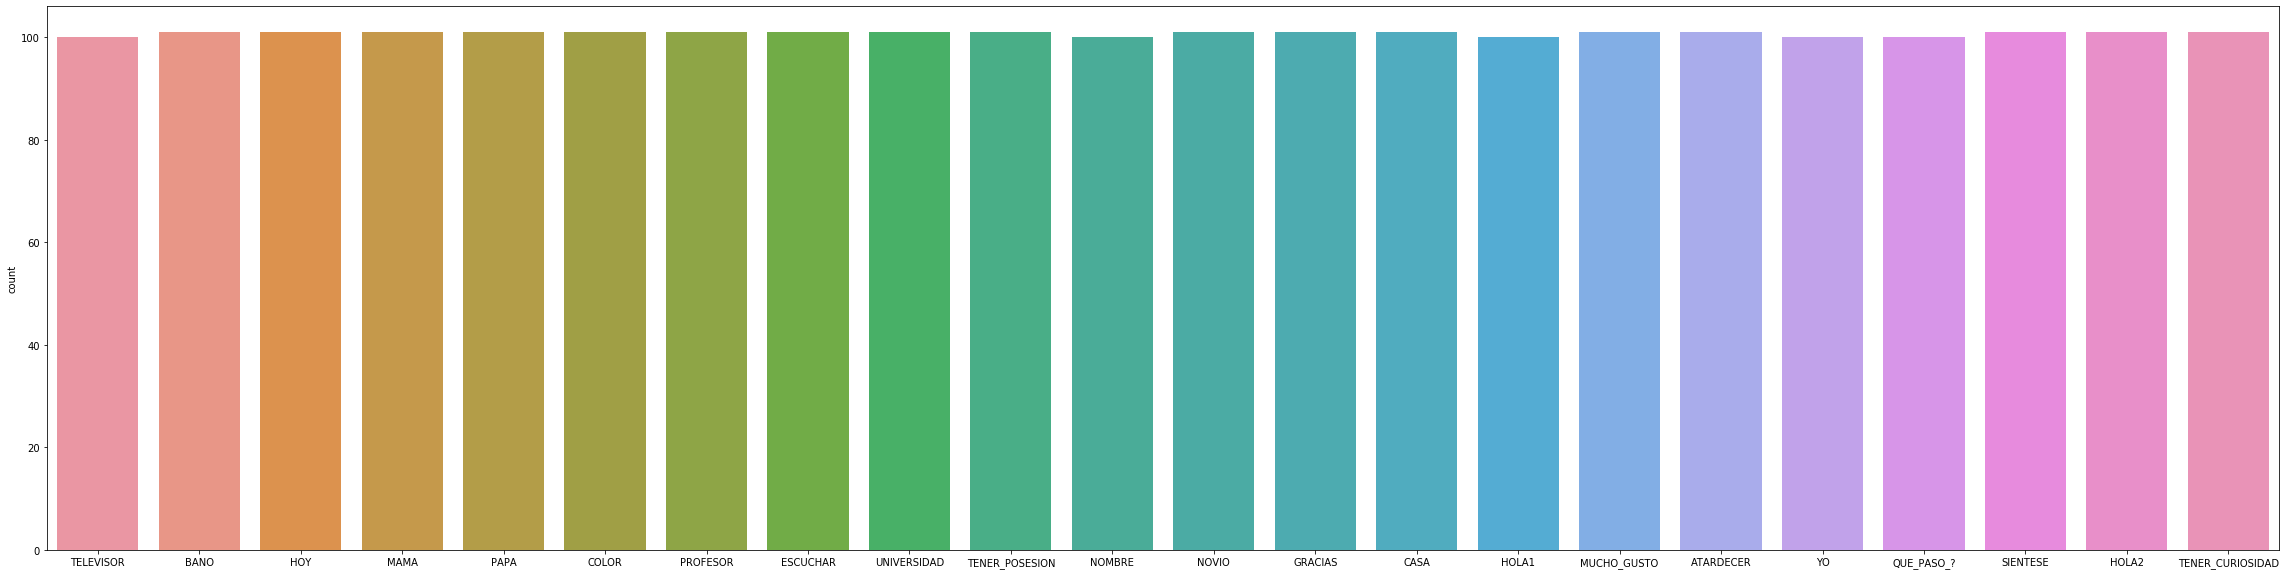

In [12]:
np.unique(np.array(y_train))
plt.figure(figsize=(40,10))
sns.countplot(x = y_train)

In [13]:
## usamos ahora con las etiquetas en One Hot Code
x_train, x_test, y_train, y_test = train_test_split(matriz, labels_one, test_size = 0.3, stratify=labels_one, random_state = 101)

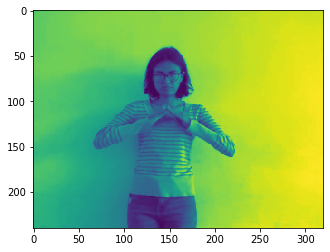

In [14]:
plt.imshow(x_train[11].reshape(240,320))

In [15]:
y_train[11]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
x_train.shape

(2217, 76800)

In [17]:
x_test.shape

(951, 76800)

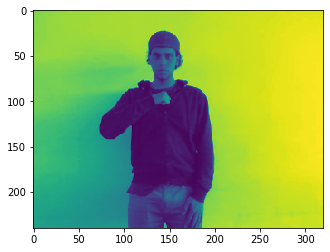

In [18]:
plt.imshow(x_test[76].reshape(240,320))

In [19]:
y_test[76]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

# Normalización Datos #

In [20]:
# Se revisa los valores Maximos y Minimos Antes de Normalizar
print(x_train.max())
print(x_train.min())
print(x_test.max())
print(x_test.min())

255.0
0.0
255.0
1.0


In [21]:
# Se normalizan los datos de entrenamiento y los de pruebas:
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

In [22]:
# Se revisa los valores Maximos y Minimos despues de Normalizar
print(x_train.max())
print(x_train.min())
print(x_test.max())
print(x_test.min())

1.0
0.0
1.0
0.003921569


# Uso de GridSearch para variar parametros #

In [23]:
# Se reconstruyen los datos de entrenamiento para que puedan ingresar a la red neuronal
x_train = x_train.reshape(x_train.shape[0], 320, 240, 1)
x_test = x_test.reshape(x_test.shape[0], 320, 240, 1)

In [24]:
network = KerasClassifier(build_fn=create_network, verbose=1)

In [25]:
neurons = [10,15,20,25,30]

In [26]:
activation = ['relu','tanh','linear','sigmoid']

In [27]:
param_grid = dict(neurons=neurons,activation=activation)

In [28]:
grid = GridSearchCV(estimator=network, param_grid=param_grid, n_jobs=-1, cv=5)

In [29]:
grid_result = grid.fit(x_train, y_train,epochs=15)

W1110 11:50:22.663908  2952 deprecation_wrapper.py:119] From C:\Users\ortiz\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1110 11:50:23.060791  2952 deprecation_wrapper.py:119] From C:\Users\ortiz\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1110 11:50:23.139122  2952 deprecation_wrapper.py:119] From C:\Users\ortiz\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1110 11:50:23.392158  2952 deprecation_wrapper.py:119] From C:\Users\ortiz\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1110 11:50:23.525089  2952 deprecation_wrapper.py:119] From C:\Users\ortiz\Ana

Epoch 1/15
2217/2217 [==============================] - 118s 53ms/step - loss: 4.2879 - acc: 0.1854
Epoch 2/15
2217/2217 [==============================] - 114s 51ms/step - loss: 1.5010 - acc: 0.5868
Epoch 3/15
2217/2217 [==============================] - 114s 51ms/step - loss: 0.8006 - acc: 0.7975
Epoch 4/15
2217/2217 [==============================] - 113s 51ms/step - loss: 0.4328 - acc: 0.9084
Epoch 5/15
2217/2217 [==============================] - 113s 51ms/step - loss: 0.2751 - acc: 0.9418
Epoch 6/15
2217/2217 [==============================] - 113s 51ms/step - loss: 0.1643 - acc: 0.9743
Epoch 7/15
2217/2217 [==============================] - 113s 51ms/step - loss: 0.1217 - acc: 0.9765
Epoch 8/15
2217/2217 [==============================] - 113s 51ms/step - loss: 0.1153 - acc: 0.9747
Epoch 9/15
2217/2217 [==============================] - 108s 49ms/step - loss: 0.1603 - acc: 0.9617
Epoch 10/15
2217/2217 [==============================] - 113s 51ms/step - loss: 0.0689 - acc: 0.9869

In [37]:
cv_results.to_csv('ResultadosGrillaCV5.csv')

In [32]:
# Ver los hiperparametros de la mejor solucion
grid_result.best_params_

{'activation': 'tanh', 'neurons': 25}

In [33]:
# Resumen de resultados
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.982860 using {'activation': 'tanh', 'neurons': 25}
0.966171 (0.016611) with: {'activation': 'relu', 'neurons': 10}
0.965268 (0.013224) with: {'activation': 'relu', 'neurons': 15}
0.949481 (0.018487) with: {'activation': 'relu', 'neurons': 20}
0.966622 (0.017458) with: {'activation': 'relu', 'neurons': 25}
0.959856 (0.013801) with: {'activation': 'relu', 'neurons': 30}
0.975643 (0.005589) with: {'activation': 'tanh', 'neurons': 10}
0.972936 (0.010208) with: {'activation': 'tanh', 'neurons': 15}
0.972485 (0.008495) with: {'activation': 'tanh', 'neurons': 20}
0.982860 (0.005448) with: {'activation': 'tanh', 'neurons': 25}
0.973387 (0.004999) with: {'activation': 'tanh', 'neurons': 30}
0.971583 (0.007618) with: {'activation': 'linear', 'neurons': 10}
0.973839 (0.005267) with: {'activation': 'linear', 'neurons': 15}
0.972485 (0.008844) with: {'activation': 'linear', 'neurons': 20}
0.973839 (0.011826) with: {'activation': 'linear', 'neurons': 25}
0.976996 (0.003318) with: {'activatio

In [35]:
cv_results = pd.DataFrame(grid_result.cv_results_)

In [36]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_neurons,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3222.167975,13.089809,28.499560,2.329321,relu,10,"{'activation': 'relu', 'neurons': 10}",0.934685,0.984234,0.970655,0.970655,0.970655,0.966171,0.016611,12
1,4437.493823,322.932851,35.967867,5.108842,relu,15,"{'activation': 'relu', 'neurons': 15}",0.968468,0.986486,0.945824,0.959368,0.966140,0.965268,0.013224,13
2,5769.457998,42.391109,39.240885,1.786771,relu,20,"{'activation': 'relu', 'neurons': 20}",0.957207,0.952703,0.916479,0.972912,0.948081,0.949481,0.018487,15
3,6960.411597,108.413911,52.796420,4.281282,relu,25,"{'activation': 'relu', 'neurons': 25}",0.970721,0.986486,0.936795,0.979684,0.959368,0.966622,0.017458,11
4,8048.800751,125.280655,53.767163,2.794564,relu,30,"{'activation': 'relu', 'neurons': 30}",0.959459,0.968468,0.975169,0.934537,0.961625,0.959856,0.013801,14
5,4082.854273,144.601962,30.183547,3.963801,tanh,10,"{'activation': 'tanh', 'neurons': 10}",0.966216,0.981982,0.972912,0.979684,0.977427,0.975643,0.005589,3
6,4708.694891,97.101906,37.043619,2.596376,tanh,15,"{'activation': 'tanh', 'neurons': 15}",0.977477,0.986486,0.977427,0.957111,0.966140,0.972936,0.010208,7
7,5971.118627,178.978108,42.302524,4.087399,tanh,20,"{'activation': 'tanh', 'neurons': 20}",0.966216,0.986486,0.975169,0.972912,0.961625,0.972485,0.008495,8
8,7327.336161,51.112776,50.950549,0.795106,tanh,25,"{'activation': 'tanh', 'neurons': 25}",0.975225,0.990991,0.979684,0.981941,0.986456,0.982860,0.005448,1
9,8052.446978,159.505944,49.225951,1.707305,tanh,30,"{'activation': 'tanh', 'neurons': 30}",0.968468,0.968468,0.975169,0.981941,0.972912,0.973387,0.004999,6


In [38]:
cv_results.sort_values(by='mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_neurons,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,7327.336161,51.112776,50.950549,0.795106,tanh,25,"{'activation': 'tanh', 'neurons': 25}",0.975225,0.990991,0.979684,0.981941,0.986456,0.982860,0.005448,1
14,7644.837171,127.851546,57.007540,18.862352,linear,30,"{'activation': 'linear', 'neurons': 30}",0.975225,0.979730,0.975169,0.972912,0.981941,0.976996,0.003318,2
5,4082.854273,144.601962,30.183547,3.963801,tanh,10,"{'activation': 'tanh', 'neurons': 10}",0.966216,0.981982,0.972912,0.979684,0.977427,0.975643,0.005589,3
13,6453.268701,120.707531,53.923839,2.453679,linear,25,"{'activation': 'linear', 'neurons': 25}",0.970721,0.986486,0.981941,0.952596,0.977427,0.973839,0.011826,4
11,4148.393823,20.640142,36.682018,1.630268,linear,15,"{'activation': 'linear', 'neurons': 15}",0.970721,0.979730,0.966140,0.972912,0.979684,0.973839,0.005267,5


In [111]:
results = grid_result.cv_results_["mean_test_score"].reshape(len(param_grid["activation"]),
                                                   len(param_grid["neurons"]))

In [112]:
results

array([[0.9661705 , 0.96526838, 0.94948128, 0.96662156, 0.95985566],
       [0.97564276, 0.9729364 , 0.97248534, 0.98285972, 0.97338746],
       [0.97158322, 0.97383852, 0.97248534, 0.97383852, 0.97699594],
       [0.03924222, 0.04691024, 0.03969328, 0.0518719 , 0.0473613 ]])

In [113]:
dataHeat2 = pd.DataFrame(results,activation,neurons)

In [114]:
dataHeat2

,10,15,20,25,30
relu,0.966171,0.965268,0.949481,0.966622,0.959856
tanh,0.975643,0.972936,0.972485,0.982860,0.973387
linear,0.971583,0.973839,0.972485,0.973839,0.976996
sigmoid,0.039242,0.046910,0.039693,0.051872,0.047361


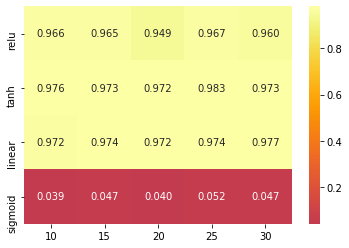

In [126]:
sns.heatmap(dataHeat2, center=0, cmap='inferno', annot=True, fmt='.3f')

In [34]:
# Miramos con el mejor resultado para los datos de Test:
grid_result.score(x_test,y_test)

951/951 [==============================] - 16s 17ms/step


0.9884332281808622

# Construimos modelo #

In [85]:
# Construccion de la red Neuronal
model = Sequential()
model.add(Conv2D(25, kernel_size=(3,3), activation = 'tanh', input_shape=(320, 240 ,1) ))
model.add(MaxPool2D(2))
model.add(Conv2D(25, kernel_size=3, activation='tanh'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(22, activation='softmax'))

In [86]:
# Resumen del modelo
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 318, 238, 25)      250       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 159, 119, 25)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 157, 117, 25)      5650      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 78, 58, 25)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 113100)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 22)                2488222   
Total params: 2,494,122
Trainable params: 2,494,122
Non-trainable params: 0
_________________________________________________________________


In [87]:
# Compilacion del modelo
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [88]:
# Ajuste del modelo sobre los datos de entrenamiento
training = model.fit(x_train, y_train,epochs=15, batch_size=128)

Epoch 1/15
2217/2217 [==============================] - 77s 35ms/step - loss: 8.7776 - acc: 0.0501
Epoch 2/15
2217/2217 [==============================] - 77s 35ms/step - loss: 4.1350 - acc: 0.1322
Epoch 3/15
2217/2217 [==============================] - 78s 35ms/step - loss: 2.3078 - acc: 0.3329
Epoch 4/15
2217/2217 [==============================] - 81s 37ms/step - loss: 1.8034 - acc: 0.4998
Epoch 5/15
2217/2217 [==============================] - 82s 37ms/step - loss: 1.4178 - acc: 0.6644
Epoch 6/15
2217/2217 [==============================] - 81s 36ms/step - loss: 1.1698 - acc: 0.7501
Epoch 7/15
2217/2217 [==============================] - 81s 37ms/step - loss: 1.0371 - acc: 0.7533
Epoch 8/15
2217/2217 [==============================] - 82s 37ms/step - loss: 0.8561 - acc: 0.7988
Epoch 9/15
2217/2217 [==============================] - 81s 36ms/step - loss: 0.7557 - acc: 0.8349
Epoch 10/15
2217/2217 [==============================] - 82s 37ms/step - loss: 0.6898 - acc: 0.8318
Epoch 11/

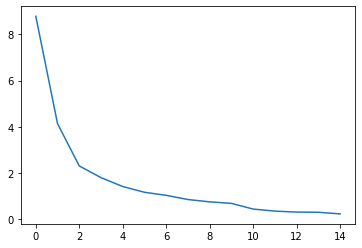

In [89]:
# Imagen del entrenamiento durante cada epoch
plt.plot(training.history['loss'])
plt.show()

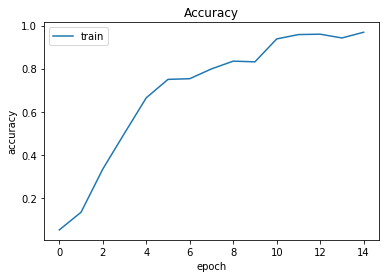

In [90]:
# Graficas de precision
plt.plot(training.history['acc'])
#plt.plot(training.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [91]:
# vemos las variables que se miden
model.metrics_names

['loss', 'acc']

In [92]:
# evaluamos el modelo para observar que la precision es mas alta que la de los datos entrenados lo que evita Overfitting
model.evaluate(x_test,y_test)

951/951 [==============================] - 8s 8ms/step


[0.2498133069082515, 0.9631966353716284]

In [93]:
# Veamos que predice el modelo con los datos de prueba o de Test
predictions = model.predict_classes(x_test)

In [94]:
y_test.shape

(951, 22)

In [95]:
predictions

array([16,  8, 18, 14,  0, 17, 10,  1,  6,  0, 18, 10,  9, 19,  0,  9, 19,
        6,  2,  5, 14, 10, 19, 17, 21, 20, 20,  2,  6, 10,  3,  3, 15,  1,
        6,  1, 13,  7,  1, 19,  0,  1,  7, 12, 10,  3, 15,  5, 18, 20,  8,
        8,  9, 10, 17, 11,  6, 17, 10,  7, 10,  8,  4,  3,  8, 18, 19,  3,
        5, 21, 11, 18, 18,  0, 10, 20, 19, 19, 15, 10, 10,  7,  9, 15,  6,
       12, 16, 14, 17,  6,  9, 16, 13,  4,  2,  0, 17,  0,  2, 17, 11,  6,
        7,  6, 10,  9, 16,  3,  8, 11,  6,  6, 18, 12, 10, 21,  5, 18, 18,
        7,  4, 11, 19, 15,  4,  0, 17, 18, 13,  7, 12,  2,  7, 15,  2, 17,
       13, 10, 12,  9, 21,  0, 20, 19, 17,  8, 20, 19,  7, 18,  5, 11,  8,
        4,  0,  0,  3, 14,  4,  7, 18, 15,  3,  3, 20, 12,  5, 15, 13, 12,
       20, 13,  3,  4, 21,  3, 18, 20, 10, 10,  5, 12,  0,  0,  4, 16, 20,
       15, 12, 16, 17, 12,  4, 20, 16, 18, 14,  1,  6,  3,  1, 13, 15,  5,
        4,  6, 18,  4, 14, 20,  4,  1,  2, 14, 14,  6,  7,  8, 21, 14, 20,
       19, 11, 17,  3,  2

In [96]:
predictios_to_cat = label_binrizer.fit_transform(predictions)

In [97]:
# veamos lo de cada clase
print(classification_report(y_test,predictios_to_cat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        43
           4       1.00      0.95      0.98        44
           5       0.98      1.00      0.99        43
           6       0.69      0.98      0.81        44
           7       0.84      0.63      0.72        43
           8       1.00      0.98      0.99        43
           9       1.00      1.00      1.00        43
          10       1.00      0.98      0.99        44
          11       1.00      0.91      0.95        43
          12       1.00      1.00      1.00        43
          13       0.98      1.00      0.99        43
          14       1.00      1.00      1.00        43
          15       0.95      0.93      0.94        44
          16       1.00      1.00      1.00        43
          17       0.98    

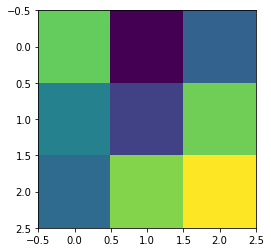

In [98]:
# Obtenemos los valores de la primera matriz de convolucion
conv1 = model.layers[0]
weights1 = conv1.get_weights()
kernels1 = weights1[0]
kernel1_1 = kernels1[:, :, 0, 0]
plt.imshow(kernel1_1)

In [99]:
test_image = matriz[21].reshape(240,320)

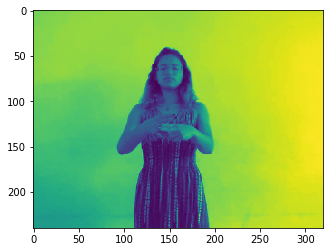

In [100]:
plt.imshow(test_image)

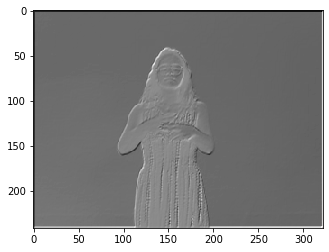

In [101]:
# Convolucion de imagen con el primer Kernel
res = convolve2d(test_image, kernel1_1)
plt.imshow(res, cmap='gray')

In [102]:
letras_prediccion = binaryToWords(predictios_to_cat)

In [103]:
letras_prediccion

['SIENTESE',
 'HOY',
 'TENER_CURIOSIDAD',
 'PROFESOR',
 'ATARDECER',
 'TELEVISION',
 'MUCHO_GUSTO',
 'BANO',
 'HOLA1',
 'ATARDECER',
 'TENER_CURIOSIDAD',
 'MUCHO_GUSTO',
 'MAMA',
 'TENER_POSESION',
 'ATARDECER',
 'MAMA',
 'TENER_POSESION',
 'HOLA1',
 'CASA',
 'GRACIAS',
 'PROFESOR',
 'MUCHO_GUSTO',
 'TENER_POSESION',
 'TELEVISION',
 'YO',
 'UNIVERSIDAD',
 'UNIVERSIDAD',
 'CASA',
 'HOLA1',
 'MUCHO_GUSTO',
 'COLOR',
 'COLOR',
 'QUE_PASO_?',
 'BANO',
 'HOLA1',
 'BANO',
 'PAPA',
 'HOLA2',
 'BANO',
 'TENER_POSESION',
 'ATARDECER',
 'BANO',
 'HOLA2',
 'NOVIO',
 'MUCHO_GUSTO',
 'COLOR',
 'QUE_PASO_?',
 'GRACIAS',
 'TENER_CURIOSIDAD',
 'UNIVERSIDAD',
 'HOY',
 'HOY',
 'MAMA',
 'MUCHO_GUSTO',
 'TELEVISION',
 'NOMBRE',
 'HOLA1',
 'TELEVISION',
 'MUCHO_GUSTO',
 'HOLA2',
 'MUCHO_GUSTO',
 'HOY',
 'ESCUCHAR',
 'COLOR',
 'HOY',
 'TENER_CURIOSIDAD',
 'TENER_POSESION',
 'COLOR',
 'GRACIAS',
 'YO',
 'NOMBRE',
 'TENER_CURIOSIDAD',
 'TENER_CURIOSIDAD',
 'ATARDECER',
 'MUCHO_GUSTO',
 'UNIVERSIDAD',
 'TENER_

In [104]:
len(letras_prediccion)

951

In [105]:
letras_reales = binaryToWords(y_test)

In [106]:
letras_reales

['SIENTESE',
 'HOY',
 'TENER_CURIOSIDAD',
 'PROFESOR',
 'ATARDECER',
 'TELEVISION',
 'MUCHO_GUSTO',
 'BANO',
 'HOLA1',
 'ATARDECER',
 'TENER_CURIOSIDAD',
 'MUCHO_GUSTO',
 'MAMA',
 'TENER_POSESION',
 'ATARDECER',
 'MAMA',
 'TENER_POSESION',
 'HOLA1',
 'CASA',
 'GRACIAS',
 'PROFESOR',
 'MUCHO_GUSTO',
 'TENER_POSESION',
 'TELEVISION',
 'YO',
 'UNIVERSIDAD',
 'UNIVERSIDAD',
 'CASA',
 'HOLA1',
 'MUCHO_GUSTO',
 'COLOR',
 'COLOR',
 'QUE_PASO_?',
 'BANO',
 'HOLA1',
 'BANO',
 'PAPA',
 'HOLA2',
 'BANO',
 'TENER_POSESION',
 'ATARDECER',
 'BANO',
 'HOLA2',
 'NOVIO',
 'MUCHO_GUSTO',
 'COLOR',
 'QUE_PASO_?',
 'GRACIAS',
 'TENER_CURIOSIDAD',
 'UNIVERSIDAD',
 'HOY',
 'HOY',
 'MAMA',
 'MUCHO_GUSTO',
 'TELEVISION',
 'NOMBRE',
 'HOLA2',
 'TELEVISION',
 'MUCHO_GUSTO',
 'HOLA2',
 'MUCHO_GUSTO',
 'HOY',
 'ESCUCHAR',
 'COLOR',
 'HOY',
 'TENER_CURIOSIDAD',
 'TENER_POSESION',
 'COLOR',
 'GRACIAS',
 'NOMBRE',
 'NOMBRE',
 'TENER_CURIOSIDAD',
 'TENER_CURIOSIDAD',
 'ATARDECER',
 'MUCHO_GUSTO',
 'UNIVERSIDAD',
 'TE

In [107]:
MatrizConfusion = pretty_confusion_matrix(letras_reales, letras_prediccion, ["HOY","YO","HOLA1","HOLA2","QUE_PASO_?","GRACIAS","MUCHO_GUSTO",
                                                   "SIENTESE","BANO","ESCUCHAR","ATARDECER","COLOR","PROFESOR","UNIVERSIDAD",
                                                   "TELEVISION","NOVIO","NOMBRE","PAPA","MAMA","TENER_POSESION'",
                                                    "TENER_CURIOSIDAD","CASA"])

In [108]:
MatrizConfusion

,HOY,YO,HOLA1,HOLA2,QUE_PASO_?,GRACIAS,MUCHO_GUSTO,SIENTESE,BANO,ESCUCHAR,...,PROFESOR,UNIVERSIDAD,TELEVISION,NOVIO,NOMBRE,PAPA,MAMA,TENER_POSESION',TENER_CURIOSIDAD,CASA
HOY,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YO,0,43,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HOLA1,0,0,43,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HOLA2,0,0,0,43,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
QUE_PASO_?,0,0,0,0,42,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GRACIAS,0,0,0,0,0,43,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MUCHO_GUSTO,0,0,0,0,0,0,43,1,0,0,...,0,0,0,0,0,0,0,0,0,0
SIENTESE,0,1,0,0,0,0,15,27,0,0,...,0,0,0,0,0,0,0,0,0,0
BANO,0,0,0,0,0,0,0,0,42,0,...,0,0,0,0,0,1,0,0,0,0
ESCUCHAR,0,0,0,0,0,0,0,0,0,43,...,0,0,0,0,0,0,0,0,0,0


In [109]:
MatrizConfusion.to_csv('MatrizConfusion.csv')

In [110]:
# Se guarda el modelo
model.save('modeloFinalCV5.h5')